## Import and configure modules

In [1]:
# import the necessary modules
import pandas as pd
import numpy as np
import os
#waveform-database:A library of tools for reading, writing, and processing WFDB signals and annotations.
import wfdb 

%matplotlib inline
import matplotlib as mlp
import matplotlib.pyplot as plt

mlp.rc("xtick",labelsize=12)
mlp.rc("ytick",labelsize=12)
mlp.rc("axes",labelsize=14)

MAIN_PATH = "/home/moon/gitWorkspace/MachineLearning/ECG-Arrythmia"
DATA_PATH = "/home/moon/gitWorkspace/MachineLearning/ECG-Arrythmia/mit-database"
FIG_PATH="/home/moon/gitWorkspace/MachineLearning/ECG-Arrythmia"
FIGURE_PATH = os.path.join(FIG_PATH,"saved_figures")
os.makedirs("saved_figures",exist_ok=True)
os.chdir(DATA_PATH)

#a function to save plotted figures
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(FIGURE_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


## Visualizing Data

In [2]:
sample = wfdb.io.rdsamp("100")
print(sample)
print("\nShape of data: ",sample[0].shape)
print("\nData: ",sample[0])
print("\nType of data: ",type(sample[0]))


(array([[-0.145, -0.065],
       [-0.145, -0.065],
       [-0.145, -0.065],
       ...,
       [-0.675, -0.365],
       [-0.765, -0.335],
       [-1.28 ,  0.   ]]), {'fs': 360, 'sig_len': 650000, 'n_sig': 2, 'base_date': None, 'base_time': None, 'units': ['mV', 'mV'], 'sig_name': ['MLII', 'V5'], 'comments': ['69 M 1085 1629 x1', 'Aldomet, Inderal']})

Shape of data:  (650000, 2)

Data:  [[-0.145 -0.065]
 [-0.145 -0.065]
 [-0.145 -0.065]
 ...
 [-0.675 -0.365]
 [-0.765 -0.335]
 [-1.28   0.   ]]

Type of data:  <class 'numpy.ndarray'>


Saving figure MLII and V5 100


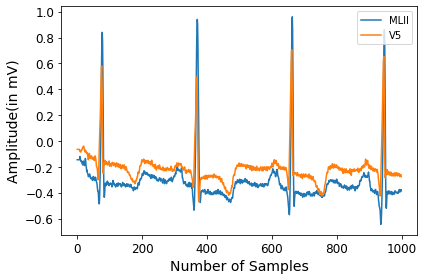

In [3]:
sample_MLII = sample[0][:,0]
sample_V5 = sample[0][:,1]
plt.plot(sample_MLII[:1000])
plt.plot(sample_V5[:1000])
plt.xlabel("Number of Samples")
plt.ylabel("Amplitude(in mV)")
plt.legend(("MLII","V5"),loc="upper right")
save_fig("MLII and V5 100")

## An example of a normal heart beat

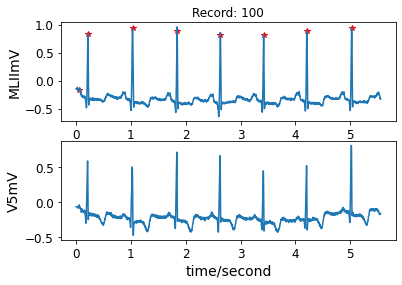

{'record_name': '100', 'extension': 'atr', 'sample': array([  18,   77,  370,  662,  946, 1231, 1515, 1809]), 'symbol': ['+', 'N', 'N', 'N', 'N', 'N', 'N', 'N'], 'subtype': array([0, 0, 0, 0, 0, 0, 0, 0]), 'chan': array([0, 0, 0, 0, 0, 0, 0, 0]), 'num': array([0, 0, 0, 0, 0, 0, 0, 0]), 'aux_note': ['(N\x00', '', '', '', '', '', '', ''], 'fs': 360, 'label_store': None, 'description': None, 'custom_labels': None, 'contained_labels': None, 'ann_len': 8}


In [4]:
a = wfdb.rdann("100","atr",sampto=2000)
r = wfdb.rdrecord("100",sampto=2000)
wfdb.plot_wfdb(record=r,annotation=a,time_units="seconds")
print(a.__dict__)

## An example of a abnormal heart beat 

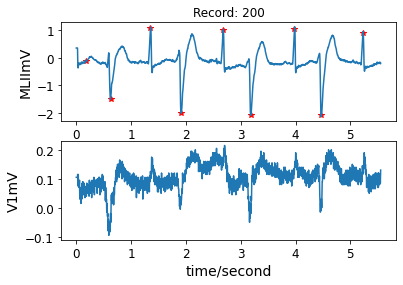

{'record_name': '200', 'extension': 'atr', 'sample': array([  67,  225,  487,  689,  964, 1147, 1433, 1610, 1882]), 'symbol': ['+', 'V', 'N', 'V', 'N', 'V', 'N', 'V', 'N'], 'subtype': array([0, 1, 0, 1, 0, 1, 0, 1, 0]), 'chan': array([0, 0, 0, 0, 0, 0, 0, 0, 0]), 'num': array([0, 0, 0, 0, 0, 0, 0, 0, 0]), 'aux_note': ['(B\x00', '', '', '', '', '', '', '', ''], 'fs': 360, 'label_store': None, 'description': None, 'custom_labels': None, 'contained_labels': None, 'ann_len': 9}


In [5]:
a = wfdb.rdann("200","atr",sampto=2000)
r = wfdb.rdrecord("200",sampto=2000)
wfdb.plot_wfdb(record=r,annotation=a,time_units="seconds")
print(a.__dict__)

Saving figure 101-MLII.png


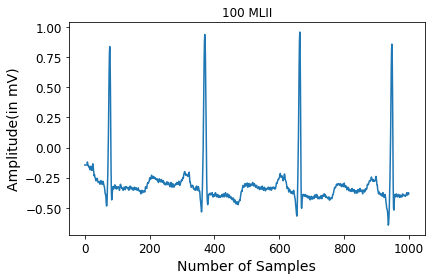

In [6]:
plt.plot(sample_MLII[:1000])
plt.xlabel("Number of Samples")
plt.ylabel("Amplitude(in mV)")
plt.title("100 MLII")

save_fig("101-MLII.png")

Saving figure 101-V5.png


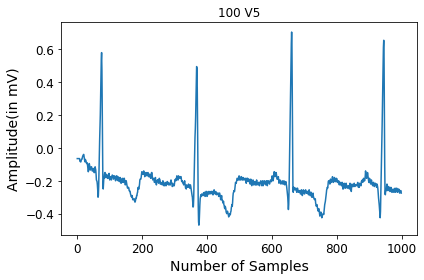

In [7]:
plt.plot(sample_V5[:1000])
plt.xlabel("Number of Samples")
plt.ylabel("Amplitude(in mV)")
plt.title("100 V5")

save_fig("101-V5.png")



 ## Importing and Preparing Data

In [8]:
# RECORDS file contains all the record names of the corresponding patients
records = np.loadtxt(os.path.join(DATA_PATH,"RECORDS"), dtype=str)
print(records)
print(len(records))

['100' '101' '102' '103' '104' '105' '106' '107' '108' '109' '111' '112'
 '113' '114' '115' '116' '117' '118' '119' '121' '122' '123' '124' '200'
 '201' '202' '203' '205' '207' '208' '209' '210' '212' '213' '214' '215'
 '217' '219' '220' '221' '222' '223' '228' '230' '231' '232' '233' '234']
48


In [9]:
def read_data():
    dataset = []
    for record in records:
        temp = wfdb.rdrecord(record)
        dataset.append(temp.p_signal)
    return dataset

Saving figure 234-MLII.png


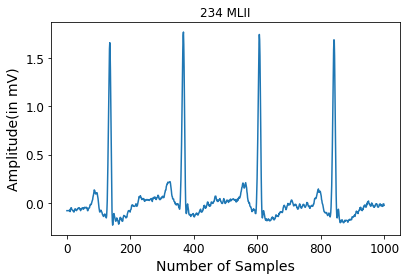

In [10]:
dataset = read_data()
dataset[47]

#Plotting the last record MLII data
plt.plot(dataset[47][:1000,0])

plt.xlabel("Number of Samples")
plt.ylabel("Amplitude(in mV)")
plt.title("234 MLII")

save_fig("234-MLII.png")

Saving figure 234-V5.png


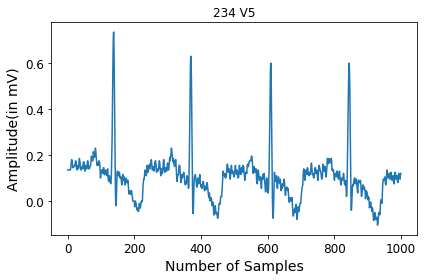

In [11]:
#PLotting the last record V5 data
plt.plot(dataset[47][:1000,1])
plt.xlabel("Number of Samples")
plt.ylabel("Amplitude(in mV)")
plt.title("234 V5")

save_fig("234-V5.png")

In [12]:
#Showing all the labels present in our data
wfdb.io.show_ann_labels()

    label_store symbol                                    description
0             0                              Not an actual annotation
1             1      N                                    Normal beat
2             2      L                  Left bundle branch block beat
3             3      R                 Right bundle branch block beat
4             4      a                Aberrated atrial premature beat
5             5      V              Premature ventricular contraction
6             6      F          Fusion of ventricular and normal beat
7             7      J              Nodal (junctional) premature beat
8             8      A                   Atrial premature contraction
9             9      S     Premature or ectopic supraventricular beat
10           10      E                        Ventricular escape beat
11           11      j                 Nodal (junctional) escape beat
12           12      /                                     Paced beat
13           13     

## Valid and Invalid beats 

In [13]:
invalid_beat = [
    "[", "!", "]", "x", "(", ")", "p", "t", 
    "u", "`", "'", "^", "|", "~", "+", "s", 
    "T", "*", "D", "=",'"', "@", "B", "a", "J", "S",
    "r", "F", "e", "j", "n", "f", "Q", "?"
]

label_beats=[
    "A", "L", "/", "V", "R", "E", "N"
]

## Beat Segmentation

In [14]:
def classify(symbol):
    if symbol in label_beats:
        return 1
    else:
        return 0
    
def segment(signal_MLII, beat_loc):
    window=180
    count=1
    x=beat_loc-window
    y=beat_loc+window
    samp=signal_MLII[x:y]
    return samp

all_signals=[]
all_labels=[]
for record in records:
    temp=wfdb.rdrecord(record)
    annot_temp=wfdb.rdann(record, 'atr')
    ann_sample=annot_temp.sample
    ann_symbol=annot_temp.symbol
    fs=temp.fs
    signal=temp.p_signal
    signal_MLII=signal[:,0]
    for i, i_sample in enumerate(ann_sample):
        label_dec=classify(ann_symbol[i])
        segmentation=segment(signal_MLII, i_sample)
        if label_dec==1 and len(segmentation)==360:
            all_signals.append(segmentation)
            all_labels.append(ann_symbol[i])


In [15]:
# vstack Stacks arrays in sequence vertically (row wise).
all_signals_fin=np.vstack(all_signals)

In [16]:
print(all_signals_fin.shape)

(107141, 360)


## Visualizing Segmentated Data

N


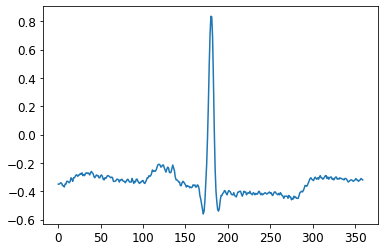

In [17]:
#PLotting
plt.plot(all_signals_fin[187])
print(all_labels[187])

In [18]:
labels_fin=pd.Series(all_labels)

In [19]:
for i, value in enumerate(labels_fin):
    if value=='E':
        print(value)
        print(i)
        break

E
60641


Saving figure Ventricular Escape Beat.png


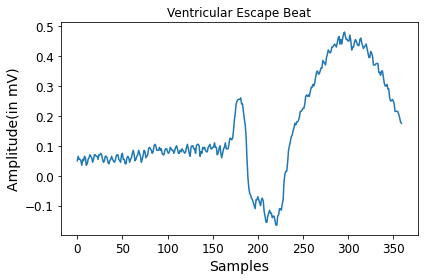

In [20]:
plt.plot(all_signals_fin[60641])
plt.xlabel('Samples')
plt.ylabel('Amplitude(in mV)')
plt.title('Ventricular Escape Beat')
save_fig("Ventricular Escape Beat.png")

## Check distribution of types of data

In [21]:
labels_fin.value_counts()

N    75011
L     8071
R     7255
V     7129
/     7023
A     2546
E      106
dtype: int64

Saving figure Pie chart before resampling


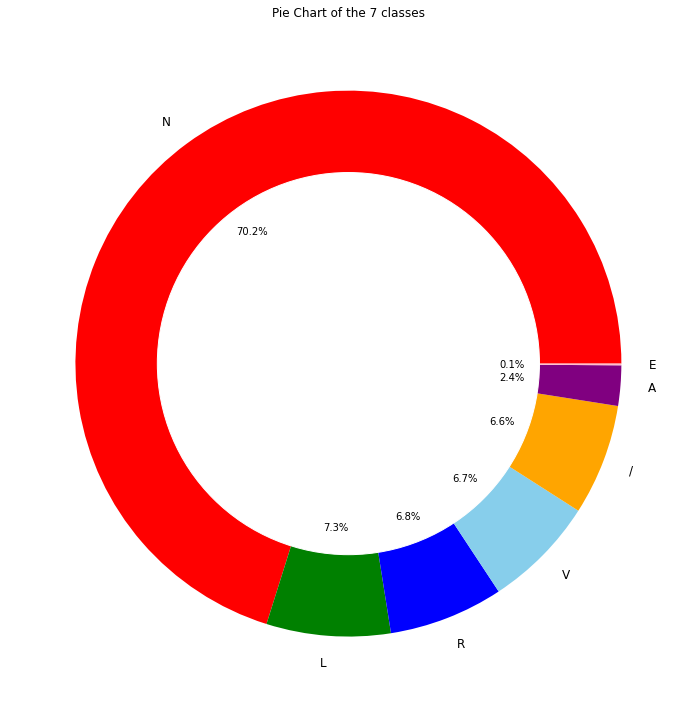

In [22]:
plt.figure(figsize=(20,10))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie([70.01, 7.33, 6.77, 6.65, 6.56, 2.38, 0.10], labels=['N','L','R','V','/', 'A', 'E'], colors=['red','green','blue','skyblue','orange', 'purple', 'pink'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title("Pie Chart of the 7 classes")
save_fig("Pie chart before resampling")
plt.show()

## Resampling

In [23]:
len(all_signals_fin)
labels_array=np.array(all_labels)

In [24]:
df_0=all_signals_fin[labels_fin=='/']
df_1=all_signals_fin[labels_fin=='A']
df_2=all_signals_fin[labels_fin=='E']
df_3=all_signals_fin[labels_fin=='L']
df_4=all_signals_fin[labels_fin=='N']
df_5=all_signals_fin[labels_fin=='R']
df_6=all_signals_fin[labels_fin=='V']
y_df0=labels_array[labels_fin=='/']
print(len(df_0))
print(y_df0)
len(y_df0)

7023
['/' '/' '/' ... '/' '/' '/']


7023

In [25]:
from sklearn.utils import resample

In [26]:
df0_sampled=resample(df_0, replace=True, n_samples=20000, random_state=42)
df1_sampled=resample(df_1, replace=True, n_samples=20000, random_state=42)
df2_sampled=resample(df_2, replace=True, n_samples=20000, random_state=42)
df3_sampled=resample(df_3, replace=True, n_samples=20000, random_state=42)
df4_sampled=resample(df_4, replace=True, n_samples=20000, random_state=42)
df5_sampled=resample(df_5, replace=True, n_samples=20000, random_state=42)
df6_sampled=resample(df_6, replace=True, n_samples=20000, random_state=42)


In [27]:
print(len(df0_sampled))
print(len(df1_sampled))
print(len(df2_sampled))
print(len(df3_sampled))
print(len(df4_sampled))
print(len(df5_sampled))
print(len(df6_sampled))

20000
20000
20000
20000
20000
20000
20000


In [28]:
y_0=['/']*len(df0_sampled)
y_1=['A']*len(df1_sampled)
y_2=['E']*len(df2_sampled)
y_3=['L']*len(df3_sampled)
y_4=['N']*len(df4_sampled)
y_5=['R']*len(df5_sampled)
y_6=['V']*len(df6_sampled)
    

In [29]:
X_final=[]
X_final.extend(df0_sampled)
X_final.extend(df1_sampled)
X_final.extend(df2_sampled)
X_final.extend(df3_sampled)
X_final.extend(df4_sampled)
X_final.extend(df5_sampled)
X_final.extend(df6_sampled)

In [30]:
print(len(X_final))

140000


In [31]:
y_final=[]
y_final.extend(y_0)
y_final.extend(y_1)
y_final.extend(y_2)
y_final.extend(y_3)
y_final.extend(y_4)
y_final.extend(y_5)
y_final.extend(y_6)

In [32]:
len(y_final)

140000

Saving figure Pie chart afetr resampling


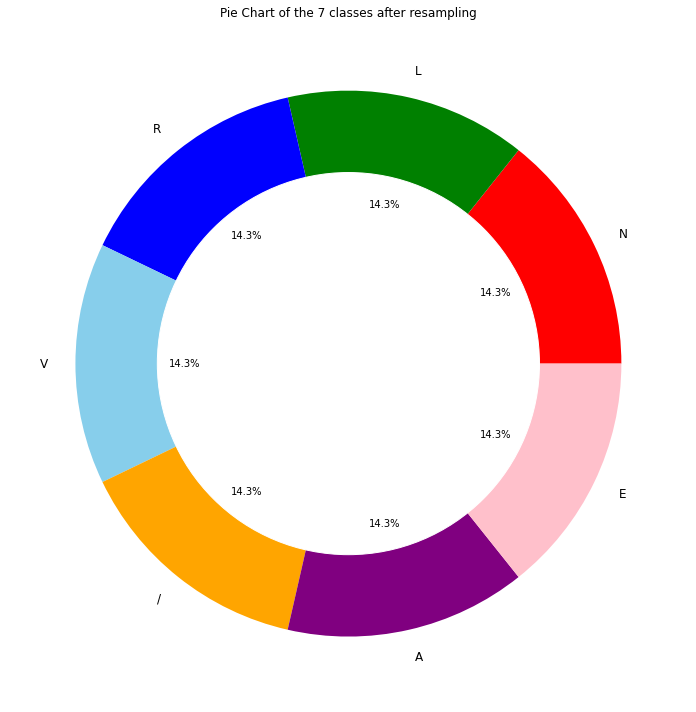

In [33]:
plt.figure(figsize=(20,10))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie([14.29, 14.29, 14.29, 14.29, 14.29, 14.29, 14.29], labels=['N','L','R','V','/', 'A', 'E'], colors=['red','green','blue','skyblue','orange', 'purple', 'pink'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title("Pie Chart of the 7 classes after resampling")
save_fig("Pie chart afetr resampling")
plt.show()

## Standarization of the data

In [34]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [35]:
scaled=scaler.fit_transform(X_final)

In [36]:
def check_strat(y):
    dummy = pd.DataFrame(y,columns=["Labels"])
    print("Value distribution:\n")
    count = dummy["Labels"].value_counts()
    percent = dummy["Labels"].value_counts(normalize=True).mul(100).round(2)
    print(pd.concat([count,percent],axis=1,keys=["Counts","Percent"]))

In [37]:
check_strat(y_final)

Value distribution:

   Counts  Percent
A   20000    14.29
N   20000    14.29
E   20000    14.29
/   20000    14.29
R   20000    14.29
V   20000    14.29
L   20000    14.29


## Splitting Data into Train and Test Set

In [38]:
from sklearn.model_selection import StratifiedShuffleSplit
strad=StratifiedShuffleSplit()

In [39]:
assin_strad=strad.split(scaled, y_final)

In [40]:
train_index, test_index=next(assin_strad)

In [41]:
train_data_scaled=scaled[train_index]

In [42]:
from sklearn.preprocessing import LabelEncoder
lab=LabelEncoder()

In [43]:
labels_final=lab.fit_transform(y_final)

In [44]:
lab.classes_

array(['/', 'A', 'E', 'L', 'N', 'R', 'V'], dtype='<U1')

In [45]:
train_label=labels_final[train_index]

In [46]:
test_data_scaled=scaled[test_index]

In [47]:
test_labels=labels_final[test_index]

In [48]:
check_strat(test_labels)

Value distribution:

   Counts  Percent
0    2000    14.29
1    2000    14.29
2    2000    14.29
3    2000    14.29
4    2000    14.29
5    2000    14.29
6    2000    14.29


In [49]:
check_strat(train_label)

Value distribution:

   Counts  Percent
0   18000    14.29
1   18000    14.29
2   18000    14.29
3   18000    14.29
4   18000    14.29
5   18000    14.29
6   18000    14.29


## Training Models

### Training a SVM Classifier in 2 Folds CV

In [50]:
from sklearn.svm import SVC
cls=SVC(verbose=3)
cls.fit(train_data_scaled, train_label.flatten())

[LibSVM]*.
*
optimization finished, #iter = 1081
obj = -208.900842, rho = 0.106239
nSV = 525, nBSV = 284
*
optimization finished, #iter = 333
obj = -108.366017, rho = -1.611474
nSV = 210, nBSV = 175
*
optimization finished, #iter = 954
obj = -207.532207, rho = 0.326927
nSV = 473, nBSV = 274
*.*
optimization finished, #iter = 1464
obj = -302.580070, rho = 0.769695
nSV = 761, nBSV = 400
*
optimization finished, #iter = 675
obj = -123.165758, rho = -0.311010
nSV = 302, nBSV = 160
.
*
optimization finished, #iter = 1637
obj = -285.273409, rho = 0.880822
nSV = 870, nBSV = 363
*
optimization finished, #iter = 392
obj = -160.922492, rho = -3.296460
nSV = 333, nBSV = 281
.
*.
*
optimization finished, #iter = 2115
obj = -603.670862, rho = 0.072170
nSV = 1283, nBSV = 857
......
*..
*
optimization finished, #iter = 8185
obj = -4865.977590, rho = 0.541081
nSV = 6897, nBSV = 6086
..
*
optimization finished, #iter = 2530
obj = -1235.365970, rho = -1.548065
nSV = 2108, nBSV = 1742
.
*.
*
optimization

SVC(verbose=3)

In [51]:
print(train_label[1])

5


In [52]:
cls.predict([train_data_scaled[1]])

array([5])

In [53]:
#Accuracy of the model
from sklearn.metrics import accuracy_score
acc=accuracy_score(train_label, cls.predict(train_data_scaled))
print(acc)

0.9856984126984127


In [54]:
#Recall of the model
from sklearn.metrics import recall_score
recall=recall_score(train_label, cls.predict(train_data_scaled), average='macro')
print(recall)

0.9856984126984126


In [ ]:
#Precision of the model
from sklearn.metrics import precision_score
precision=precision_score(train_label, cls.predict(train_data_scaled), average='macro')
print(precision)